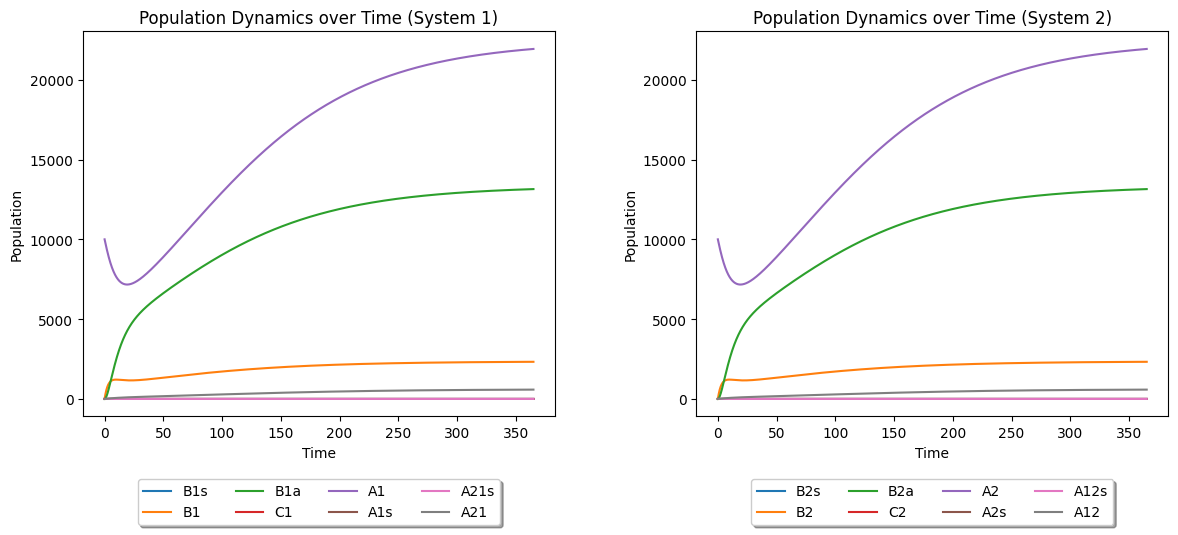

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L1 = 1500
L2 = 1500
w1 = 21000
w2 = 21000
beta1 = 1/3
beta2 = 1/17
alpha1 = 0.001
phi1 = 1/3
phi2 = 1
v = 10000
sigma = 0.001
alpha2 = 1
alpha3 = 0.0005
mu = 1/30
d1 = 0.003
d2 = 0.003
gamma1 = 0.7
gamma2 = 0.7
re1 = 0.64
re2 = 0.64

# Define initial conditions
init_conditions = [0, 0, 0, 0, 10000, 0, 0, 0, 0, 0, 10000, 0, 0, 0, 0, 0]

# Define time parameters
STARTTIME = 0
STOPTIME = 365
DT = 0.02
num_steps = int((STOPTIME - STARTTIME) / DT)

# Define RK4 method
def rk4(f, t, y, dt):
    k1 = np.array(f(t, y))
    k2 = np.array(f(t + 0.5*dt, y + 0.5*dt*k1))
    k3 = np.array(f(t + 0.5*dt, y + 0.5*dt*k2))
    k4 = np.array(f(t + dt, y + dt*k3))
    return y + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

# Define the system of differential equations
def model(t, y):
    B1s, B1, B1a, C1, A1, A1s, B2s, B2, B2a, C2, A2, A2s, A21s, A21, A12s, A12 = y

    M1 = L1*((A1+A1s+A21+A21s)/(w1+A1+A1s+A21+A21s))
    P1 = (A1s+A21s)/(1+A1+A1s+A21+A21s)

    M2 = L2*((A2+A2s+A12+A12s)/(w2+A2+A2s+A12+A12s))
    P2 = (A2s+A12s)/(1+A2+A2s+A12+A12s)

    dB1s_dt = (alpha1*P1*B1)+(C1/v)*M1-(phi1*phi2*B1s)
    dB1_dt = M1-(alpha1*P1*B1)-(C1/v)*M1-beta1*B1
    dB1a_dt = (beta1*B1)-(beta2*B1a)
    dC1_dt = (phi1*phi2*B1s)*(sigma*(v-C1))
    dA1s_dt = (beta2*alpha1*P1*B1a)+(alpha2*(C1/v)*A1)+(alpha3*P1*A1)-(mu*A1s)-(d1*A1s)+(re1*gamma1*d1*A1s)
    dA1_dt = beta2*(1-alpha1*P1)*B1a-(alpha2*(C1/v)*A1)-(alpha3*P1*A1)-(mu*A1)-(d1*A1)+(re1*gamma1*d1*A1)

    dB2s_dt = (alpha1*P2*B2)+(C2/v)*M2-(phi1*phi2*B2s)
    dB2_dt = M2-(alpha1*P2*B2)-(C2/v)*M2-beta1*B2
    dB2a_dt = (beta1*B2)-(beta2*B2a)
    dC2_dt = (phi1*phi2*B2s)*(sigma*(v-C2))
    dA2s_dt = (beta2*alpha1*P2*B2a)+(alpha2*(C2/v)*A2)+(alpha3*P2*A2)-(mu*A2s)-(d2*A2s)+(re2*gamma2*d2*A2s)
    dA2_dt = beta2*(1-alpha1*P2)*B2a-(alpha2*(C2/v)*A2)-(alpha3*P2*A2)-(mu*A2)-(d2*A2)+(re2*gamma2*d2*A2)

    dA21s_dt = (d2*A2s)-(gamma2*d2*A2s)-mu*A21s+(alpha2*(C1/v)*A21)+(alpha3*P1*A21)
    dA21_dt = (d2*A2)-(gamma2*d2*A2)-mu*A21-(alpha2*(C1/v)*A21)-(alpha3*P1*A21)
    dA12s_dt = (d1*A1s)-(gamma1*d1*A1s)-mu*A12s+(alpha2*(C2/v)*A12)+(alpha3*P2*A12)
    dA12_dt = (d1*A1)-(gamma1*d1*A1)-mu*A12-(alpha2*(C2/v)*A12)-(alpha3*P2*A12)

    return [dB1s_dt, dB1_dt, dB1a_dt, dC1_dt, dA1_dt, dA1s_dt, dB2s_dt, dB2_dt, dB2a_dt, dC2_dt, dA2_dt, dA2s_dt, dA21s_dt, dA21_dt, dA12s_dt, dA12_dt]

# Initialize arrays to store results
t_values = np.zeros(num_steps+1)
y_values = np.zeros((num_steps+1, len(init_conditions)))

# Set initial conditions
t_values[0] = STARTTIME
y_values[0] = init_conditions

# Time integration using RK4
for i in range(num_steps):
    t = t_values[i]
    y = y_values[i]
    y_next = rk4(model, t, y, DT)
    t_values[i+1] = t + DT
    y_values[i+1] = y_next

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# First subplot
axs[0].plot(t_values, y_values[:, 0], label='B1s')
axs[0].plot(t_values, y_values[:, 1], label='B1')
axs[0].plot(t_values, y_values[:, 2], label='B1a')
axs[0].plot(t_values, y_values[:, 3], label='C1')
axs[0].plot(t_values, y_values[:, 4], label='A1')
axs[0].plot(t_values, y_values[:, 5], label='A1s')
axs[0].plot(t_values, y_values[:, 12], label='A21s')
axs[0].plot(t_values, y_values[:, 13], label='A21')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population')
axs[0].set_title('Population Dynamics over Time (System 1)')
axs[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=4)

# Second subplot
axs[1].plot(t_values, y_values[:, 6], label='B2s')
axs[1].plot(t_values, y_values[:, 7], label='B2')
axs[1].plot(t_values, y_values[:, 8], label='B2a')
axs[1].plot(t_values, y_values[:, 9], label='C2')
axs[1].plot(t_values, y_values[:, 10], label='A2')
axs[1].plot(t_values, y_values[:, 11], label='A2s')
axs[1].plot(t_values, y_values[:, 14], label='A12s')
axs[1].plot(t_values, y_values[:, 15], label='A12')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Population')
axs[1].set_title('Population Dynamics over Time (System 2)')
axs[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=4)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

